# Logic functions as approximations for the input function of a gene

**How similar are the dynamics of the accumulation of protein Y in X -> Y when we use:**
1. f(X) = X/(K+X) (Michaelis-Menten)
2. f(x) = X^2/(K^2+X^2) (Hill cooperativity n = 2)
3. a step function

**as the input function for:**

dY/dt = f(X*) - aY

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


X = np.linspace(.001,1)

# define constants

a = 1 # removal rate
K = 0.33 # dissociation constant
n = 2 # hill coefficient

In [2]:
# INPUT FUNCTION DEFINITIONS

# MM input function
def MM_fxn(X):
    f_X = X / (K + X)
    return f_X

# hill input function
def hill_fxn(X):
    f_X = X**n / (K**n + X**n)
    return f_X

# logic input function
def logic_fxn(X):
    f_X = []
    for value in X:
        if value >= K:
            f_X.append(1)
        if value < K:
            f_X.append(0)
    return f_X

# define input function
input1 = MM_fxn(X)
input2 = hill_fxn(X)
input3 = logic_fxn(X)

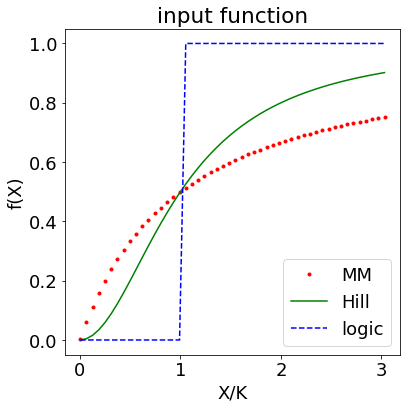

In [3]:
# plot input fxns
plt.rcParams.update({'font.size': 18})

fig1 = plt.figure(figsize=(6,6))
plt.title('input function')
plt.plot(X/K, input1, 'r.')
plt.plot(X/K, input2, 'g')
plt.plot(X/K, input3, 'b--')
plt.xlabel('X/K')
plt.ylabel('f(X)')

# legend
plt.legend(labels=['MM', 'Hill', 'logic'], loc = 'lower right')

In [4]:
# function returning dy/dt
def y_activation_1(Y, t):
    x_star = (1/a)*(1-np.exp(-a*t))
    dy_dt_1 = MM_fxn(x_star) - a*Y
    return dy_dt_1

def y_activation_2(Y, t):
    x_star = (1/a)*(1-np.exp(-a*t))
    dy_dt_2 = hill_fxn(x_star) - a*Y
    return dy_dt_2

x_star_array = []
def y_activation_3(Y, t):
    x_star = (1/a)*(1-np.exp(-a*t))
    if x_star >= K:
        x_star = 1
    if x_star < K:
        x_star = 0
    dy_dt_3 = x_star - a*Y
    return dy_dt_3

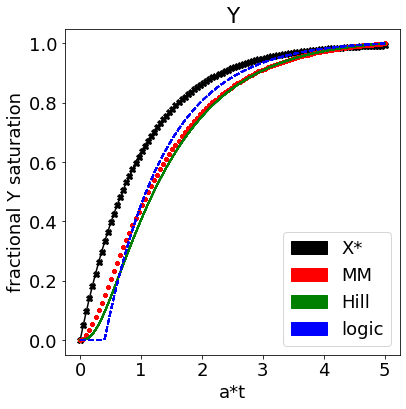

In [5]:
# initial condition
y0 = np.zeros(50)

# time points
t = np.linspace(0,5, 100)

# solve ODE
Y1 = odeint(y_activation_1, y0, t)
Y2 = odeint(y_activation_2, y0, t)
Y3 = odeint(y_activation_3, y0, t)

# plot results
fig2 = plt.figure(figsize = (6,6))
plt.title('Y')
plt.plot(a*t, (1/a)*(1-np.exp(-a*t)), 'k', marker = 'X', label = 'X*')
plt.plot(a*t, Y1 / Y1[-1] , 'r.', label = 'MM')
plt.plot(a*t, Y2 / Y2[-1] , 'g', label = 'Hill')
plt.plot(a*t, Y3 / Y3[-1] , 'b--', label = 'logic')
plt.xlabel('a*t')
plt.ylabel('fractional Y saturation')
plt.ylim(-.05, 1.05)

# legend
X = mpatches.Patch(color = 'k', label = 'X*')
MM = mpatches.Patch(color = 'r', label = 'MM')
Hill = mpatches.Patch(color = 'g', label = 'Hill')
logic = mpatches.Patch(color = 'b', label = 'logic')

plt.legend(handles=[X, MM, Hill, logic], loc = 'lower right')